In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from math import sqrt

import scipy, matplotlib
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

mainData = pd.read_csv('clean_dataframe.csv')
sb.set() # set the default Seaborn style for graphics

In [2]:
Critic_Scores = pd.DataFrame(mainData['Critic_Score'])
User_Scores = pd.DataFrame(mainData['User_Score'])
Global_Sales = pd.DataFrame(mainData['Global_Sales'])
Year_Release = pd.DataFrame(mainData['Year_of_Release'])

## Linear Regression function

In [3]:
def linearRegression(predictor, response, testsize): # linearRegression(grlivarea, price,0.2)
    # train_test_split returns 4 values
    # Split the Dataset into Train and Test, with test_size= 0.2 if predictor total 1000, X_train: 800 data pts, X_test: 200 data pts 
    X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size = testsize)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Predict Total values corresponding to HP
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

    plt.show()


## Linear Relation Between User Score and Critic Score

Intercept of Regression 	: b =  [34.51408367]
Coefficients of Regression 	: a =  [[5.10587497]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2770217899659744
Mean Squared Error (MSE) 	: 124.30240846590493

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.34252620850801074
Mean Squared Error (MSE) 	: 113.15466354227951



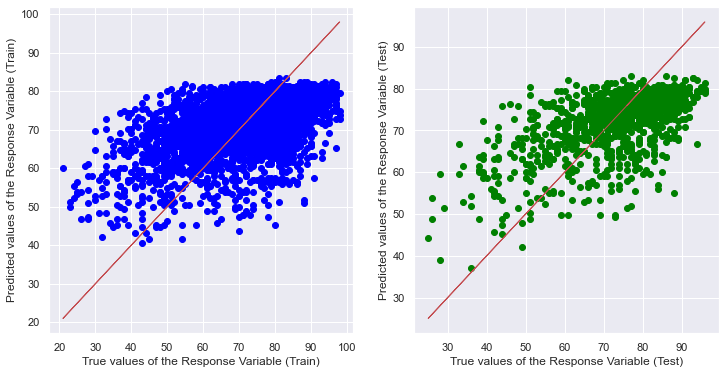

In [4]:
linearRegression(User_Scores, Critic_Scores ,0.2)

User Score and Critic Score has a high correlation

## Linear Relation Between Critic Scores and Global Sales

Intercept of Regression 	: b =  [-1.81184566]
Coefficients of Regression 	: a =  [[0.03760752]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.07711478962964091
Mean Squared Error (MSE) 	: 2.9939519852828003

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.06961802937916617
Mean Squared Error (MSE) 	: 4.562103919148031



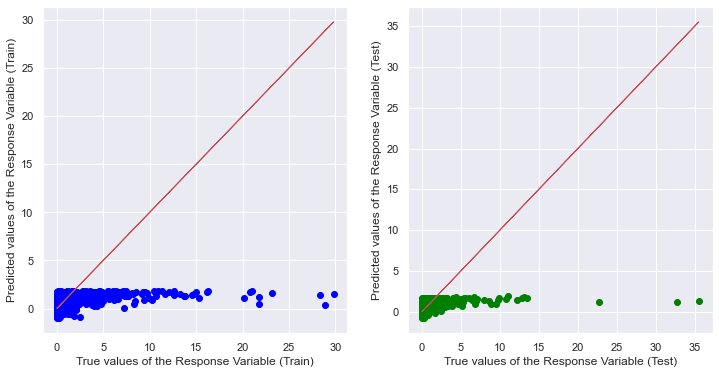

In [5]:
linearRegression(Critic_Scores, Global_Sales ,0.2)

Critic Scores and Global Sales does not seem to have much relation

## Linear Relation Between User Score and Global Sales

Intercept of Regression 	: b =  [0.04690593]
Coefficients of Regression 	: a =  [[0.11861567]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.007053811898349083
Mean Squared Error (MSE) 	: 3.7761432616163217

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.011729593944838301
Mean Squared Error (MSE) 	: 2.643478225508426



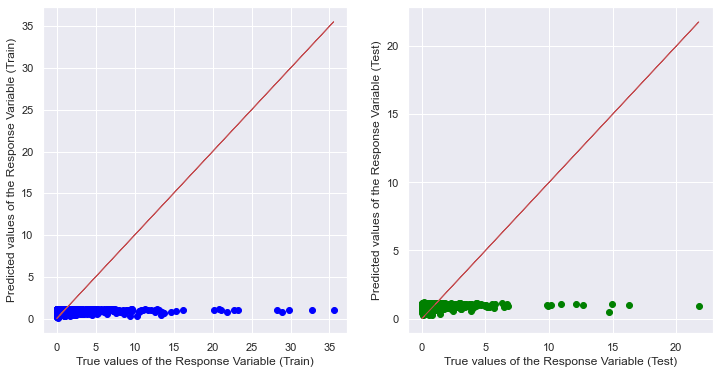

In [6]:
linearRegression(User_Scores, Global_Sales ,0.2)

User Score and Global Sales does not seem to have much relation

## Linear Relation Between Year Release and Global Sales

Intercept of Regression 	: b =  [-29.78400985]
Coefficients of Regression 	: a =  [[0.01529191]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0010339558289610418
Mean Squared Error (MSE) 	: 3.8280678051753974

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.0036315395477937162
Mean Squared Error (MSE) 	: 2.5659525818213065



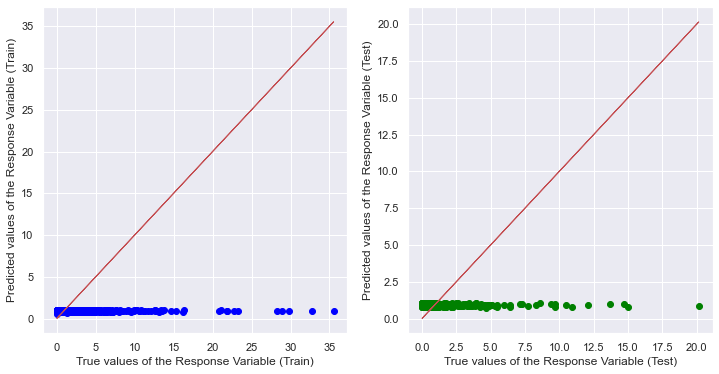

In [7]:
linearRegression(Year_Release,Global_Sales ,0.2)

Year Release and Global Sales does not seem to have much relation

## Multi-Linear Relation Between (User Score and Critic Score) and Global Sales

Intercept of Regression 	: b =  [-1.52034622]
Coefficients of Regression 	: a =  [[ 0.04803401 -0.14407429]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.09401022459468256
Mean Squared Error (MSE) 	: 2.8721618804780227

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.04614865026693826
Mean Squared Error (MSE) 	: 4.961912493090914



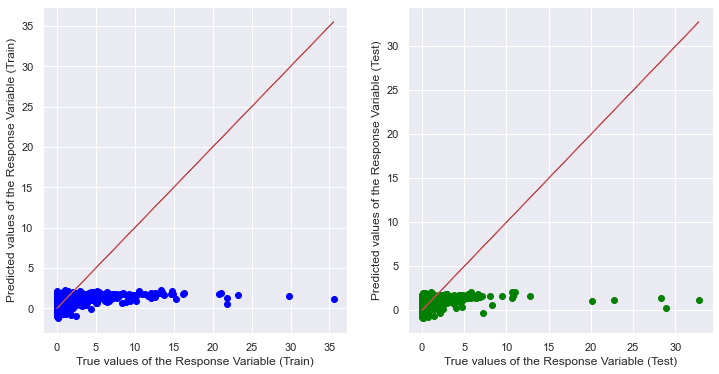

In [8]:
ConditionData = mainData[['Critic_Score','User_Score']]
linearRegression(ConditionData, Global_Sales ,0.2)

Analysis:
From the above EDA, the catplots (boxplot) show that the variables "Platform", "Publisher", "Genre", "Year of Release" and "Rating" does not seem to have much correlation with "Global_Sales". Only "Critic Score" seems to have a positive correlation with "Global_Sales".
For linear regression, "Critic Score", "User Score" and multi-variable of "Critic Score" + "User Score" does not seem to have much correlation with "Global Sales". Only "User Score" and "Critic Score" has positive correlation with each other. 
Reasons for the lack of correlation between the variables and "Global Sales" could be due to other factors that affect the sale of the video games. Factors such as advertisement, quality of the game, improvements in technology in the gaming industry, etc. These factors can help to boost the sales of the games, but are not included in this dataset